In [1]:
# Caxias do Sul - LASSO Regression

In [2]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6,4
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (6,4)})
import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_excel(r"CaxiasdoSul_ML_Std.xls")
df.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_CS
0,-0.502234,-0.771008,-0.954957,-1.152634,0.981293,1
1,-0.011977,-0.384726,-0.753369,-2.024678,2.454060,1
2,-0.637640,-0.824221,-0.983101,-1.343260,1.275377,1
3,0.079973,-0.440566,-0.781865,-2.067829,2.904549,1
4,0.141272,-0.439377,-0.781214,-2.052522,2.963625,1


In [4]:
# Predicting Cartel
# define X and y
#df.drop('Weekbegin', axis=1, inplace=True)
X = df.drop("Cartel_CS",axis = 1)
y = df.Cartel_CS

In [5]:
X.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis
0,-0.502234,-0.771008,-0.954957,-1.152634,0.981293
1,-0.011977,-0.384726,-0.753369,-2.024678,2.454060
2,-0.637640,-0.824221,-0.983101,-1.343260,1.275377
3,0.079973,-0.440566,-0.781865,-2.067829,2.904549
4,0.141272,-0.439377,-0.781214,-2.052522,2.963625


In [6]:
#importing train_test_split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
# grid search hyperparameters for lasso regression
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l1', solver='saga')
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
# define grid
grid = dict()
grid['C'] = arange(0.01, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring="accuracy", cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('accuracy: %.3f' % results.best_score_)
print('Best value for C: %s' % results.best_params_)

accuracy: 0.927
Best value for C: {'C': 0.81}


In [9]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel
sel=SelectFromModel(LogisticRegression(penalty='l1', C=0.81, solver ='saga'))
sel.fit(X_train, y_train)
sel.get_support()

array([ True,  True,  True, False, False])

In [10]:
sel.estimator_.coef_

array([[ 1.08431925,  1.09499491, -8.35497827,  0.        ,  0.        ]])

In [11]:
X_train.columns

Index(['SPD', 'CV', 'Price_sd', 'Price_skewness', 'Price_kurtosis'], dtype='object')

In [12]:
features = X_train.columns[sel.get_support()]
features

Index(['SPD', 'CV', 'Price_sd'], dtype='object')

In [13]:
logreg = LogisticRegression(penalty='l1', C=0.81, solver ='saga')
logreg.fit(X_train, y_train)

LogisticRegression(C=0.81, penalty='l1', solver='saga')

In [14]:
print(logreg.coef_, logreg.intercept_)

[[ 1.08326736  1.09939048 -8.35787173  0.          0.        ]] [-3.37201874]


In [15]:
# make class predictions for the testing set
y_pred = logreg.predict(X_test)

In [16]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
#mean_squared_error(y_test, y_pred_class)

0.9246575342465754


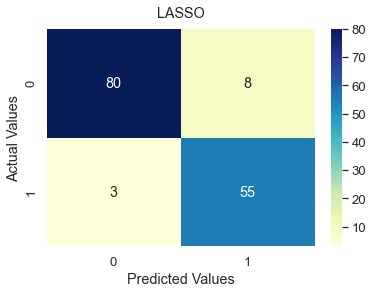

In [17]:
import seaborn as sns
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.2) # Adjust to fit
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('LASSO', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_Lasso_CaxiasdoSul.png', dpi=600)

In [18]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94        88
           1       0.87      0.95      0.91        58

    accuracy                           0.92       146
   macro avg       0.92      0.93      0.92       146
weighted avg       0.93      0.92      0.93       146



In [19]:
# store the predicted probabilities for class 1
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

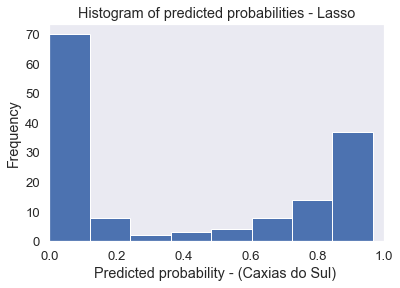

In [20]:
# histogram of predicted probabilities
plt.hist(y_pred_proba, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities - Lasso')
plt.xlabel('Predicted probability - (Caxias do Sul) ')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Histogram_Lasso_CaxiasdoSul.png', dpi=600)

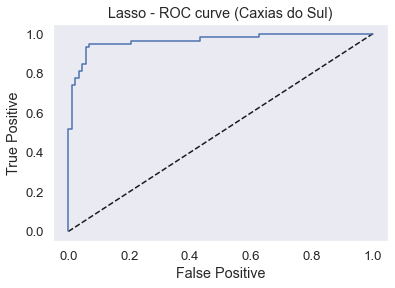

In [21]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Lasso - ROC curve (Caxias do Sul)')
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_Lasso_CaxiasdoSul.png', dpi=600)

In [22]:
from sklearn.metrics import roc_curve
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [23]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
auc = cross_val_score(logreg, X_test, y_test, cv=5, scoring='roc_auc').mean()
print('AUC:',auc)

AUC: 0.980565458506635


In [24]:
import eli5
from eli5.sklearn import PermutationImportance

In [25]:
perm = PermutationImportance(logreg, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.4438 ± 0.0372,Price_sd
0.0411 ± 0.0229,SPD
0.0356 ± 0.0236,CV
0 ± 0.0000,Price_kurtosis
0 ± 0.0000,Price_skewness


In [26]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tpr[thresholds > threshold][-1])
    print('specificity:', 1 - fpr[thresholds > threshold][-1])

In [27]:
evaluate_threshold(0.5)

sensitivity: 0.9482758620689655
specificity: 0.9318181818181819


In [28]:
evaluate_threshold(0.6)

sensitivity: 0.9310344827586207
specificity: 0.9431818181818182


In [29]:
evaluate_threshold(0.7)

sensitivity: 0.8448275862068966
specificity: 0.9431818181818182


In [30]:
evaluate_threshold(0.8)

sensitivity: 0.7413793103448276
specificity: 0.9886363636363636


In [31]:
evaluate_threshold(0.9)

sensitivity: 0.017241379310344827
specificity: 1.0


In [32]:
evaluate_threshold(0.99)

sensitivity: 0.0
specificity: 1.0
